In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
#from sklearn.utils.class_weight import compute_class_weight
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Step 1 : Data Understanding, Preparation, and Pre-Processing :

In [2]:
# loading the dataset
df_churn = pd.read_csv("train.csv")

In [3]:
pd.get_option('display.max_rows')

60

In [4]:
#reading the dataset
def_max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', 172)
df_churn.head(100).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
circle_id,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109,109
loc_og_t2o_mou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_og_t2o_mou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
loc_ic_t2o_mou,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
last_date_of_month_6,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014,6/30/2014
last_date_of_month_7,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014,7/31/2014

In [5]:
pd.set_option('display.max_rows', def_max_rows)

In [6]:
#checking shape of dataset
df_churn.shape

(69999, 172)

In [7]:
#checking info of dataset
df_churn.info("show_counts=True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

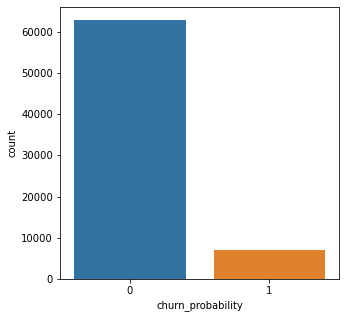

In [8]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_churn['churn_probability'])
plt.show()

In [9]:
print('churn_probability : {0}%'.format(round(((sum(df_churn['churn_probability'])/len(df_churn['churn_probability']))*100),2)))

churn_probability : 10.19%


<AxesSubplot:xlabel='aon_group'>

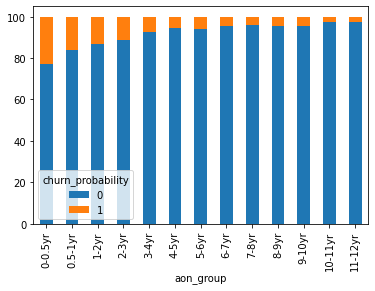

In [10]:
df_churn["aon_group"] = pd.cut(df_churn["aon"],[0,180,365,730,1095,1460,1825,2190,2555,2920,3285,3650,4015,4380], precision=0, 
    labels=['0-0.5yr','0.5-1yr','1-2yr','2-3yr','3-4yr','4-5yr','5-6yr','6-7yr','7-8yr','8-9yr','9-10yr','10-11yr','11-12yr'])

(df_churn.groupby('aon_group')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

In [11]:
for col in df_churn.columns:
    if df_churn[col].nunique() == 1:
        print("All values are same in column", col)
        print("Dropped the column",col)
        df_churn.drop(col, axis=1, inplace = True)

print("\nAfter Dropping column with single value: Dimension:",df_churn.shape)

All values are same in column circle_id
Dropped the column circle_id
All values are same in column loc_og_t2o_mou
Dropped the column loc_og_t2o_mou
All values are same in column std_og_t2o_mou
Dropped the column std_og_t2o_mou
All values are same in column loc_ic_t2o_mou
Dropped the column loc_ic_t2o_mou
All values are same in column last_date_of_month_6
Dropped the column last_date_of_month_6
All values are same in column last_date_of_month_7
Dropped the column last_date_of_month_7
All values are same in column last_date_of_month_8
Dropped the column last_date_of_month_8
All values are same in column std_og_t2c_mou_6
Dropped the column std_og_t2c_mou_6
All values are same in column std_og_t2c_mou_7
Dropped the column std_og_t2c_mou_7
All values are same in column std_og_t2c_mou_8
Dropped the column std_og_t2c_mou_8
All values are same in column std_ic_t2o_mou_6
Dropped the column std_ic_t2o_mou_6
All values are same in column std_ic_t2o_mou_7
Dropped the column std_ic_t2o_mou_7
All va

In [12]:
#Dropping the column related to recharge date as seems they are not meaninful in model.
col_date = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
            'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8']
for col in col_date:
    print("Dropped the column",col)
    df_churn.drop(col, axis=1, inplace = True)

print("\nAfter Dropping column with recharge date: Dimension:",df_churn.shape)

Dropped the column date_of_last_rech_6
Dropped the column date_of_last_rech_7
Dropped the column date_of_last_rech_8
Dropped the column date_of_last_rech_data_6
Dropped the column date_of_last_rech_data_7
Dropped the column date_of_last_rech_data_8

After Dropping column with recharge date: Dimension: (69999, 154)


In [13]:
#=============================================================================================

In [14]:
categorical_columns = [
    'total_rech_num_6',
    'total_rech_num_7',
    'total_rech_num_8',
    'total_rech_data_6',
    'total_rech_data_7',
    'total_rech_data_8',
    'count_rech_2g_6',
    'count_rech_2g_7',
    'count_rech_2g_8',
    'count_rech_3g_6',
    'count_rech_3g_7',
    'count_rech_3g_8',
    'monthly_2g_6',
    'monthly_2g_7',
    'monthly_2g_8',
    'sachet_2g_6',
    'sachet_2g_7',
    'sachet_2g_8',
    'monthly_3g_6',
    'monthly_3g_7',
    'monthly_3g_8',
    'sachet_3g_6',
    'sachet_3g_7',
    'sachet_3g_8',
    'night_pck_user_6',
    'night_pck_user_7',
    'night_pck_user_8',
    'fb_user_6',
    'fb_user_7',
    'fb_user_8',
]
print("Categorical Column in DataSet:", categorical_columns)

Categorical Column in DataSet: ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [15]:
df_churn[categorical_columns].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
total_rech_num_6,3.0,3.0,2.0,2.0,13.0,9.0,3.0,2.0,2.0,4.0,8.0,10.0,15.0,6.0,7.0,5.0,3.0,3.0,4.0,12.0
total_rech_num_7,2.0,4.0,4.0,4.0,10.0,8.0,2.0,3.0,3.0,3.0,3.0,6.0,10.0,8.0,3.0,3.0,6.0,3.0,6.0,6.0
total_rech_num_8,2.0,5.0,2.0,3.0,8.0,10.0,3.0,2.0,1.0,2.0,1.0,8.0,20.0,6.0,2.0,4.0,4.0,4.0,6.0,12.0
total_rech_data_6,NaN,NaN,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
total_rech_data_7,NaN,1.0,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rech_data_8,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
count_rech_2g_6,NaN,NaN,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN
count_rech_2g_7,NaN,0.0,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
count_rech_2g_8,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
count_rech_3g_6,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN


In [16]:
print("As total_rech_data_6/7/8 is sum of count_rech_2g/3g_6/7/8, so dropping count_rech_2g/3g_6/7/8 columns")
df_churn.drop(['count_rech_2g_6','count_rech_2g_7','count_rech_2g_8'], axis=1, inplace = True)
df_churn.drop(['count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'], axis=1, inplace = True)

As total_rech_data_6/7/8 is sum of count_rech_2g/3g_6/7/8, so dropping count_rech_2g/3g_6/7/8 columns


In [17]:
print("As total_rech_data_6/7/8 is sum of monthly_2g/3g_6/7/8, so dropping monthly_2g/3g_6/7/8 columns")
df_churn.drop(['monthly_2g_6','monthly_2g_7','monthly_2g_8'], axis=1, inplace = True)
df_churn.drop(['monthly_3g_6','monthly_3g_7','monthly_3g_8'], axis=1, inplace = True)

As total_rech_data_6/7/8 is sum of monthly_2g/3g_6/7/8, so dropping monthly_2g/3g_6/7/8 columns


In [18]:
print("As total_rech_data_6/7/8 is sum of sachet_2g/3g_6/7/8, so dropping sachet_2g/3g_6/7/8 columns")
df_churn.drop(['sachet_2g_6','sachet_2g_7','sachet_2g_8'], axis=1, inplace = True)
df_churn.drop(['sachet_3g_6','sachet_3g_7','sachet_3g_8'], axis=1, inplace = True)

As total_rech_data_6/7/8 is sum of sachet_2g/3g_6/7/8, so dropping sachet_2g/3g_6/7/8 columns


In [19]:
print("\nAfter Dropping column with recharge date: Dimension:",df_churn.shape)


After Dropping column with recharge date: Dimension: (69999, 136)


In [20]:
categorical_columns = [
    'total_rech_num_6',
    'total_rech_num_7',
    'total_rech_num_8',
    'total_rech_data_6',
    'total_rech_data_7',
    'total_rech_data_8',    
    'night_pck_user_6',
    'night_pck_user_7',
    'night_pck_user_8',
    'fb_user_6',
    'fb_user_7',
    'fb_user_8',
]
df_churn[categorical_columns].head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
total_rech_num_6,3.0,3.0,2.0,2.0,13.0,9.0,3.0,2.0,2.0,4.0,8.0,10.0,15.0,6.0,7.0,5.0,3.0,3.0,4.0,12.0
total_rech_num_7,2.0,4.0,4.0,4.0,10.0,8.0,2.0,3.0,3.0,3.0,3.0,6.0,10.0,8.0,3.0,3.0,6.0,3.0,6.0,6.0
total_rech_num_8,2.0,5.0,2.0,3.0,8.0,10.0,3.0,2.0,1.0,2.0,1.0,8.0,20.0,6.0,2.0,4.0,4.0,4.0,6.0,12.0
total_rech_data_6,NaN,NaN,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN
total_rech_data_7,NaN,1.0,NaN,NaN,7.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_rech_data_8,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
night_pck_user_6,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
night_pck_user_7,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
night_pck_user_8,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
fb_user_6,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN


In [21]:
#checking null percentage of each categorical feature in dataset
null_percentage_Of_Columns_categorcal = df_churn[categorical_columns].isnull().sum()/len(df_churn[categorical_columns])*100
null_percentage_Of_Columns_categorcal = null_percentage_Of_Columns_categorcal[null_percentage_Of_Columns_categorcal>0]
null_percentage_Of_Columns_categorcal.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns_categorcal

total_rech_data_6    74.902499
night_pck_user_6     74.902499
fb_user_6            74.902499
total_rech_data_7    74.478207
night_pck_user_7     74.478207
fb_user_7            74.478207
total_rech_data_8    73.689624
night_pck_user_8     73.689624
fb_user_8            73.689624
dtype: float64

In [22]:
# Missing value imputation for categorical variable.
df_churn[categorical_columns] = df_churn[categorical_columns].fillna(0)

#checking again null percentage of each categorical feature in dataset
null_percentage_Of_Columns_categorcal = df_churn[categorical_columns].isnull().sum()/len(df_churn[categorical_columns])*100
null_percentage_Of_Columns_categorcal = null_percentage_Of_Columns_categorcal[null_percentage_Of_Columns_categorcal>0]
null_percentage_Of_Columns_categorcal.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns_categorcal

Series([], dtype: float64)

<AxesSubplot:>

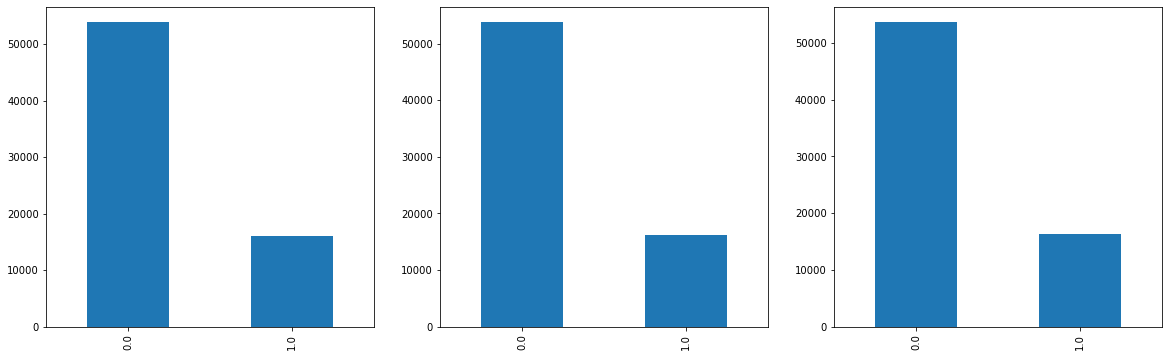

In [23]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
df_churn['fb_user_6'].value_counts().plot.bar()
plt.subplot(3,3,2)
df_churn['fb_user_7'].value_counts().plot.bar()
plt.subplot(3,3,3)
df_churn['fb_user_8'].value_counts().plot.bar()

<AxesSubplot:xlabel='fb_user_6'>

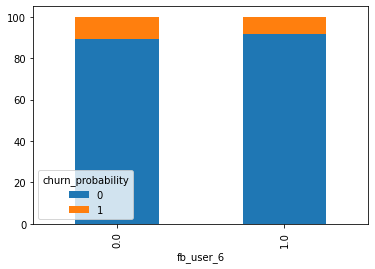

In [24]:
(df_churn.groupby('fb_user_6')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='fb_user_7'>

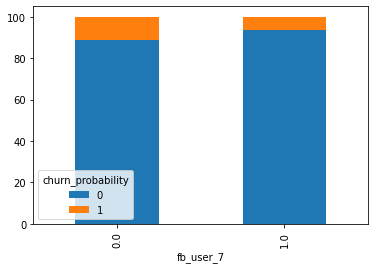

In [25]:
(df_churn.groupby('fb_user_7')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='fb_user_8'>

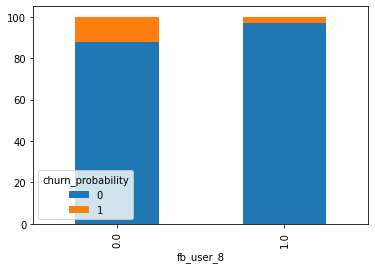

In [26]:
(df_churn.groupby('fb_user_8')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:>

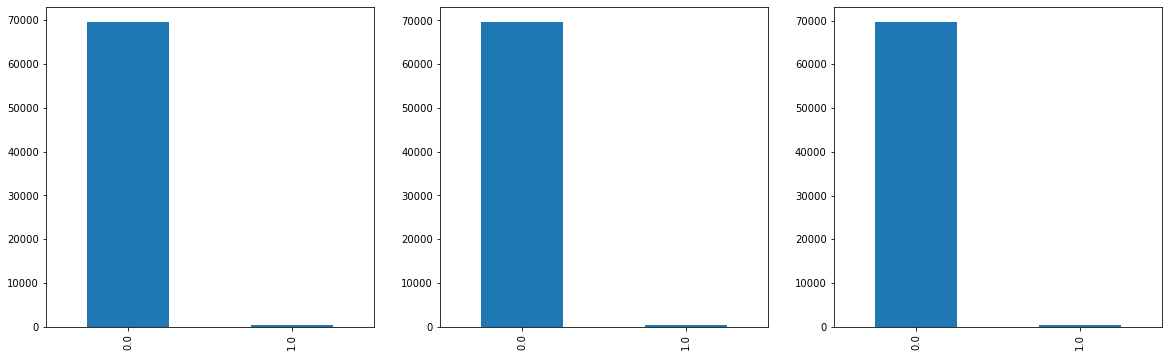

In [27]:
plt.figure(figsize=(20, 20))
plt.subplot(3,3,1)
df_churn['night_pck_user_6'].value_counts().plot.bar()
plt.subplot(3,3,2)
df_churn['night_pck_user_7'].value_counts().plot.bar()
plt.subplot(3,3,3)
df_churn['night_pck_user_8'].value_counts().plot.bar()

<AxesSubplot:xlabel='night_pck_user_6'>

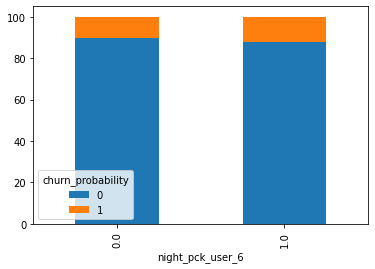

In [28]:
(df_churn.groupby('night_pck_user_6')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='night_pck_user_7'>

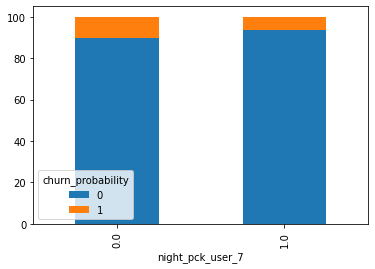

In [29]:
(df_churn.groupby('night_pck_user_7')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='night_pck_user_8'>

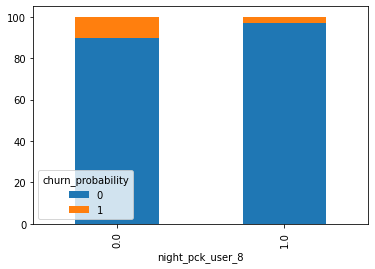

In [30]:
(df_churn.groupby('night_pck_user_8')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='total_rech_data_6'>

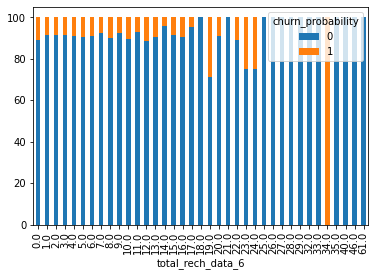

In [31]:
#plt.figure(figsize=(20, 20),  dpi=80)

(df_churn.groupby('total_rech_data_6')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)
#plt.show()

<AxesSubplot:xlabel='total_rech_data_7'>

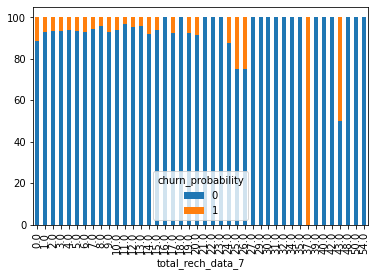

In [32]:
(df_churn.groupby('total_rech_data_7')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

<AxesSubplot:xlabel='total_rech_data_8'>

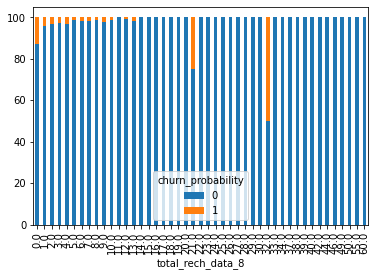

In [33]:
(df_churn.groupby('total_rech_data_8')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

In [34]:
numerical_columns = df_churn.select_dtypes(include=['int64','float']).columns
#Remove the categorical column
numerical_columns=numerical_columns.drop(categorical_columns)
#Remove the Target variable
numerical_columns=numerical_columns.drop('churn_probability')
numerical_columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'], dtype='object', length=122)

In [35]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns = df_churn[numerical_columns].isnull().sum()/len(df_churn[numerical_columns])*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

max_rech_data_6       74.902499
arpu_2g_6             74.902499
av_rech_amt_data_6    74.902499
arpu_3g_6             74.902499
av_rech_amt_data_7    74.478207
                        ...    
spl_og_mou_7           3.838626
loc_ic_t2f_mou_7       3.838626
onnet_mou_7            3.838626
loc_ic_t2m_mou_7       3.838626
og_others_7            3.838626
Length: 93, dtype: float64

In [36]:
df_churn[numerical_columns] = df_churn[numerical_columns].fillna(0)

#checking again null percentage of each numerical feature in dataset
null_percentage_Of_Columns = df_churn[numerical_columns].isnull().sum()/len(df_churn[numerical_columns])*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

Series([], dtype: float64)

In [37]:
#null_percentage_Of_Columns = df_churn.isnull().sum()/len(df_churn)*100
#null_percentage_Of_Columns_60percent = null_percentage_Of_Columns[null_percentage_Of_Columns>60]
#null_percentage_Of_Columns_60percent

In [38]:
#for col in null_percentage_Of_Columns_60percent.index:
#    df_churn.drop(col, axis=1, inplace=True)    

In [39]:
#checking shape of dataset
df_churn.shape

(69999, 136)

In [40]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns = df_churn.isnull().sum()/len(df_churn)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

Series([], dtype: float64)

In [41]:
df_churn.head()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,aon_group
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0,5-6yr
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0.0,1.0,0.0,710,0.0,0.0,0.0,0,1-2yr
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,882,0.0,0.0,0.0,0,2-3yr
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.0,0.0,0.00,0.0,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.0

In [42]:
df_churn.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,283.134365,278.185912,278.858826,127.887939,128.754731,125.943607,191.010582,189.585401,186.146273,9.379276,6.745305,6.634328,13.625476,9.464386,9.254848,45.050076,44.394344,43.269280,89.551272,87.313796,86.301054,3.595161,3.632045,3.467948,1.081499,1.308807,1.345676,13

In [43]:
df_churn.corr()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,1.000000,0.000225,0.003596,0.003855,0.002666,0.006046,0.002643,-0.007596,-0.005083,-0.003990,-0.000091,-0.001986,0.006538,-0.005495,-0.006431,-0.000177,-0.000182,0.004339,0.002469,0.002522,0.003826,0.003857,0.005159,0.001073,0.001059,-0.001637,0.000042,-0.002743,0.001784,0.005163,0.004000,0.003649,0.004627,0.001536,-0.009981,-0.007492,-0.006964,0.003290,0.006350,0.003884,-0.004064,-0.001752,-0.003502,-0.001963,-0.000847,-0.000327,-0.002061,0.002365,-0.001753,-0.003585,-0.004365,0.001259,-0.002642,0.001188,-0.001004,0.004344,0.005114,0.004712,0.002171,0.002921,0.002215,0.000802,0.001632,0.004862,0.003973,0.005123,0.004869,0.001692,0.005859,0.006334,0.001419,0.000425,0.000564,0.005702,0.010052,0.003242,0.002828,0.004625,0.004060,0.006369,0.006972,0.007130,0.004374,0.005307,-0.001622,0.007916,0.003419,0.006188,0.007754,0.003579,0.004496,-0.000283,0.003220,-0.000109,-0.000351,0.003147,0.002825,0.003258,0.005765,0.008881,-0.000441,0.003306,0.004289,-0.001376,0.001462,0.002412,0.003479,0.003311,0.005258,0.001719,0.003070,0.006255,0.004449,-0.003420,0.003472,0.003949,0.004254,0.005560,0.004934,0.002874,0.003400,0.004932,0.003468,0.004281,0.001584,0.002721,0.004012,0.006292,0.003142,0.006872,-0.000702,0.006768,0.004040,0.003071,-0.001669
arpu_6,0.000225,1.000000,0.743730,0.643193,0.450632,0.324784,0.259506,0.616059,0.455762,0.358563,0.132511,0.089524,0.086243,0.235952,0.172643,0.140823,0.237552,0.199410,0.181197,0.435082,0.360952,0.311930,0.190971,0.162799,0.149672,0.070772,0.027451,0.017975,0.431472,0.359189,0.315364,0.363922,0.249171,0.187141,0.386478,0.265942,0.184352,0.088255,0.066865,0.057118,0.490014,0.337046,0.243462,0.414701,0.383877,0.368865,0.124931,0.069070,0.057522,0.049298,0.005663,0.003963,0.667009,0.491677,0.387790,0.112922,0.087877,0.082633,0.243870,0.203490,0.171569,0.073540,0.060840,0.055452,0.236366,0.193148,0.169245,0.106616,0.075673,0.059659,0.115210,0.081091,0.068803,0.039719,0.038005,0.028090,0.147566,0.104563,0.085578,0.274957,0.217625,0.188489,0.038266,-0.079633,-0.051399,0.089464,0.061507,0.0

In [44]:
#Filter High Value Customers
df_churn['total_data_rech_amt_6'] = df_churn['total_rech_data_6'] * df_churn['av_rech_amt_data_6']
df_churn['total_data_rech_amt_7'] = df_churn['total_rech_data_7'] * df_churn['av_rech_amt_data_7']
df_churn['total_data_rech_amt_8'] = df_churn['total_rech_data_8'] * df_churn['av_rech_amt_data_8']

# Dropping columns: total_rech_data_6/7/8 and av_rech_amt_data_6/7/8 as we considered in total_data_rech_amt_6/7/8: 
df_churn.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8',
               'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8'],axis = 1,inplace = True)

df_churn['total_rech_6'] = df_churn['total_data_rech_amt_6'] + df_churn['total_rech_amt_6']
df_churn['total_rech_7'] = df_churn['total_data_rech_amt_7'] + df_churn['total_rech_amt_7']
df_churn['total_rech_8'] = df_churn['total_data_rech_amt_8'] + df_churn['total_rech_amt_8']

# Dropping columns: total_rech_data_6/7/8 and av_rech_amt_data_6/7/8 as we considered in total_data_rech_amt_6/7/8: 
df_churn.drop(['total_data_rech_amt_6','total_data_rech_amt_7','total_data_rech_amt_8',
               'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8'],axis = 1,inplace = True)


df_av_rech_6_7_8 = (df_churn['total_rech_6'] + df_churn['total_rech_7'] + df_churn['total_rech_8'])/3
percentile_70_6_7_8 = np.percentile(df_av_rech_6_7_8, 70.0)
print("70 percentile is : ", percentile_70_6_7_8)

70 percentile is :  484.3333333333333


In [45]:
df_churn = df_churn[df_av_rech_6_7_8 >= percentile_70_6_7_8]

print("\nAfter Filtering High Value Customer: Dimension:",df_churn.shape)


After Filtering High Value Customer: Dimension: (21001, 130)


In [46]:
categorical_columns.remove('total_rech_data_6')
categorical_columns.remove('total_rech_data_7')
categorical_columns.remove('total_rech_data_8')
categorical_columns

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [47]:
# Drop the column 'id' as it does not add any information 
df_churn.drop('id', axis=1, inplace=True)
# Drop the column 'aon_group' as it does not add any information 
df_churn.drop('aon_group', axis=1, inplace=True)

In [48]:
numerical_columns = df_churn.select_dtypes(include=['int64','float']).columns
#Remove the categorical column
numerical_columns=numerical_columns.drop(categorical_columns)
#Remove the Target variable
numerical_columns=numerical_columns.drop('churn_probability')
numerical_columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6',
       ...
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_6', 'total_rech_7', 'total_rech_8'], dtype='object', length=118)

In [49]:
for col in numerical_columns:
    q1 = df_churn[col].quantile(0.10)
    q3 = df_churn[col].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #df_churn = df_churn.loc[(df_churn[col] > fence_low) & (df_churn[col] < fence_high)]

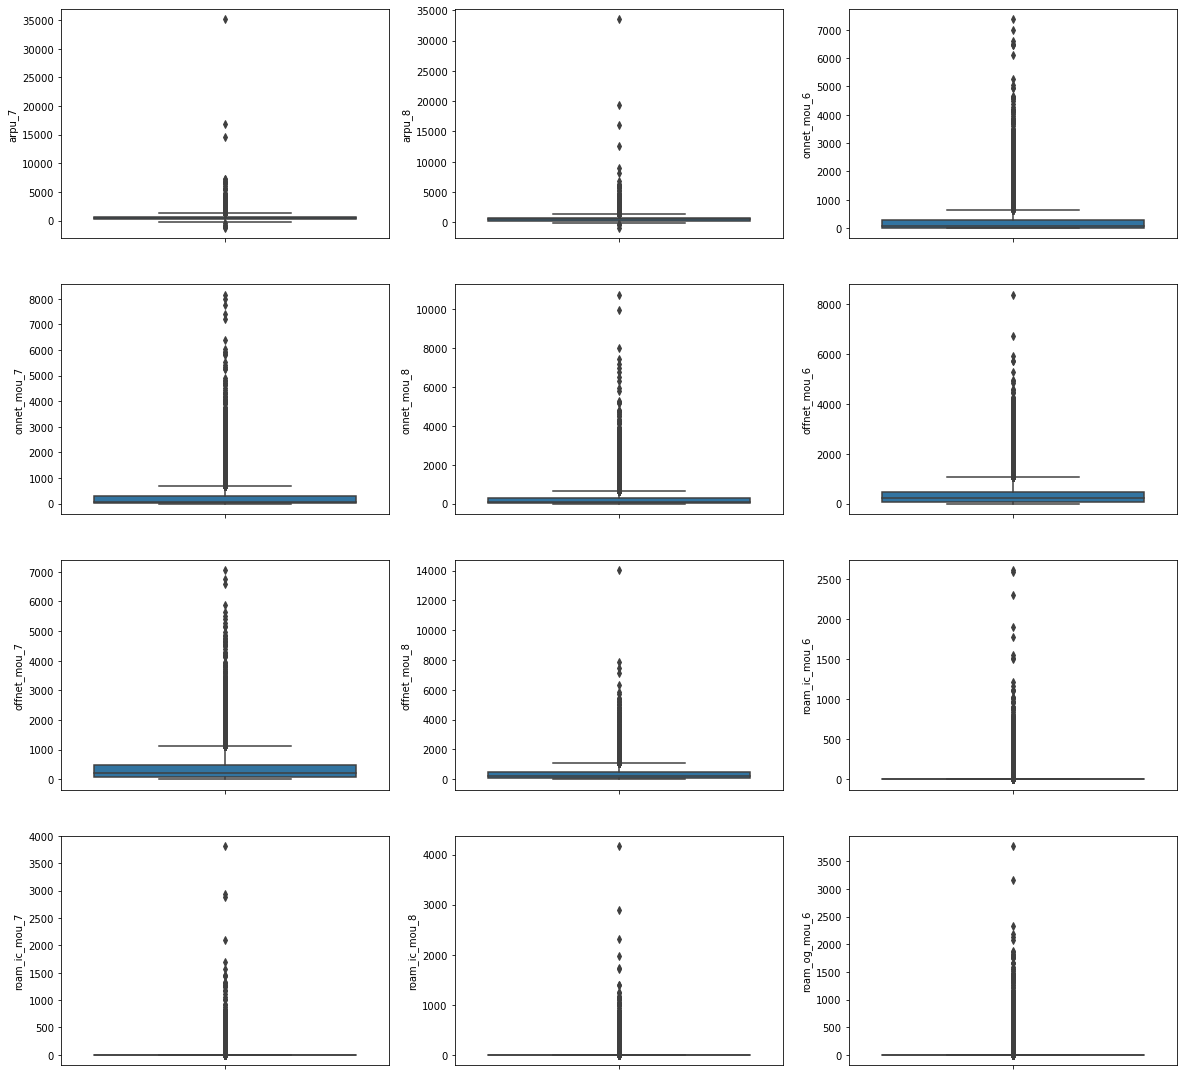

In [50]:
#Checking Outliesrs
plt.figure(figsize=(20, 60))
i=1
while i <=12:
    plt.subplot(12,3,i)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

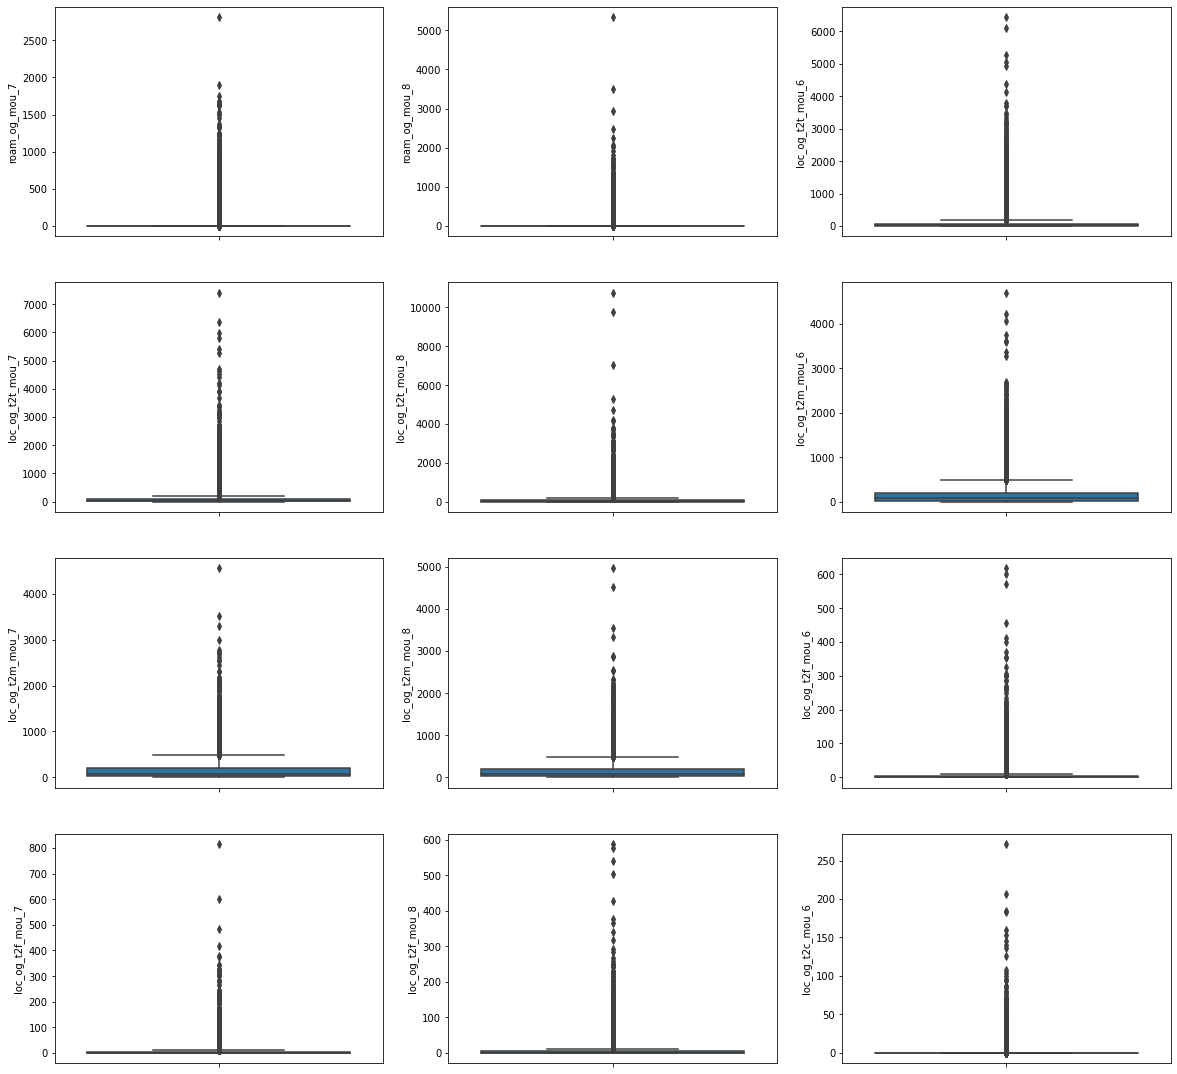

In [51]:
plt.figure(figsize=(20, 60))
i=13
while i <=24:
    plt.subplot(12,3,i-12)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

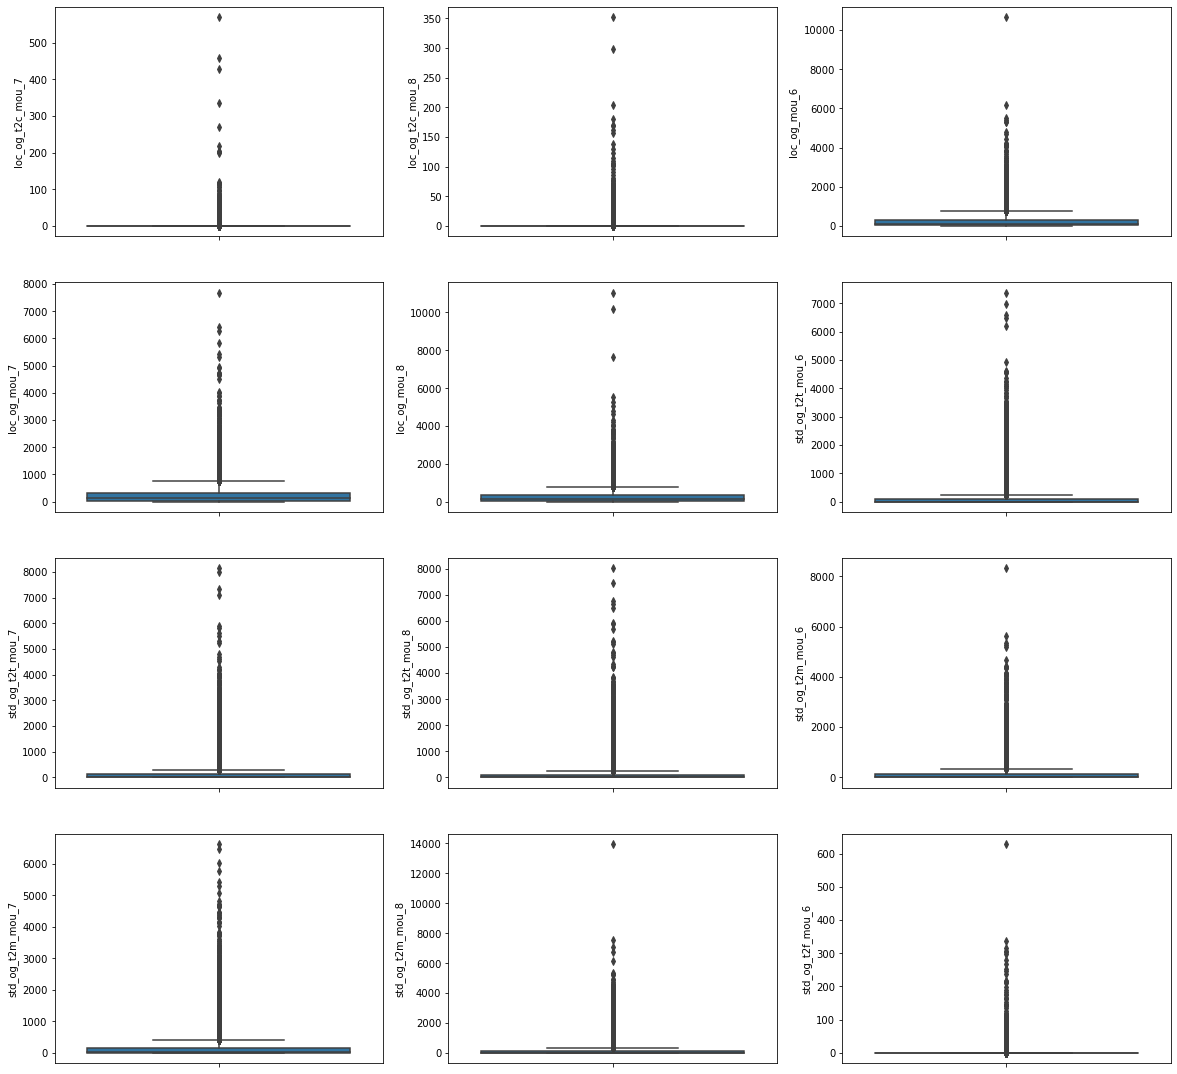

In [52]:
plt.figure(figsize=(20, 60))
i=25
while i <=36:
    plt.subplot(12,3,i-24)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

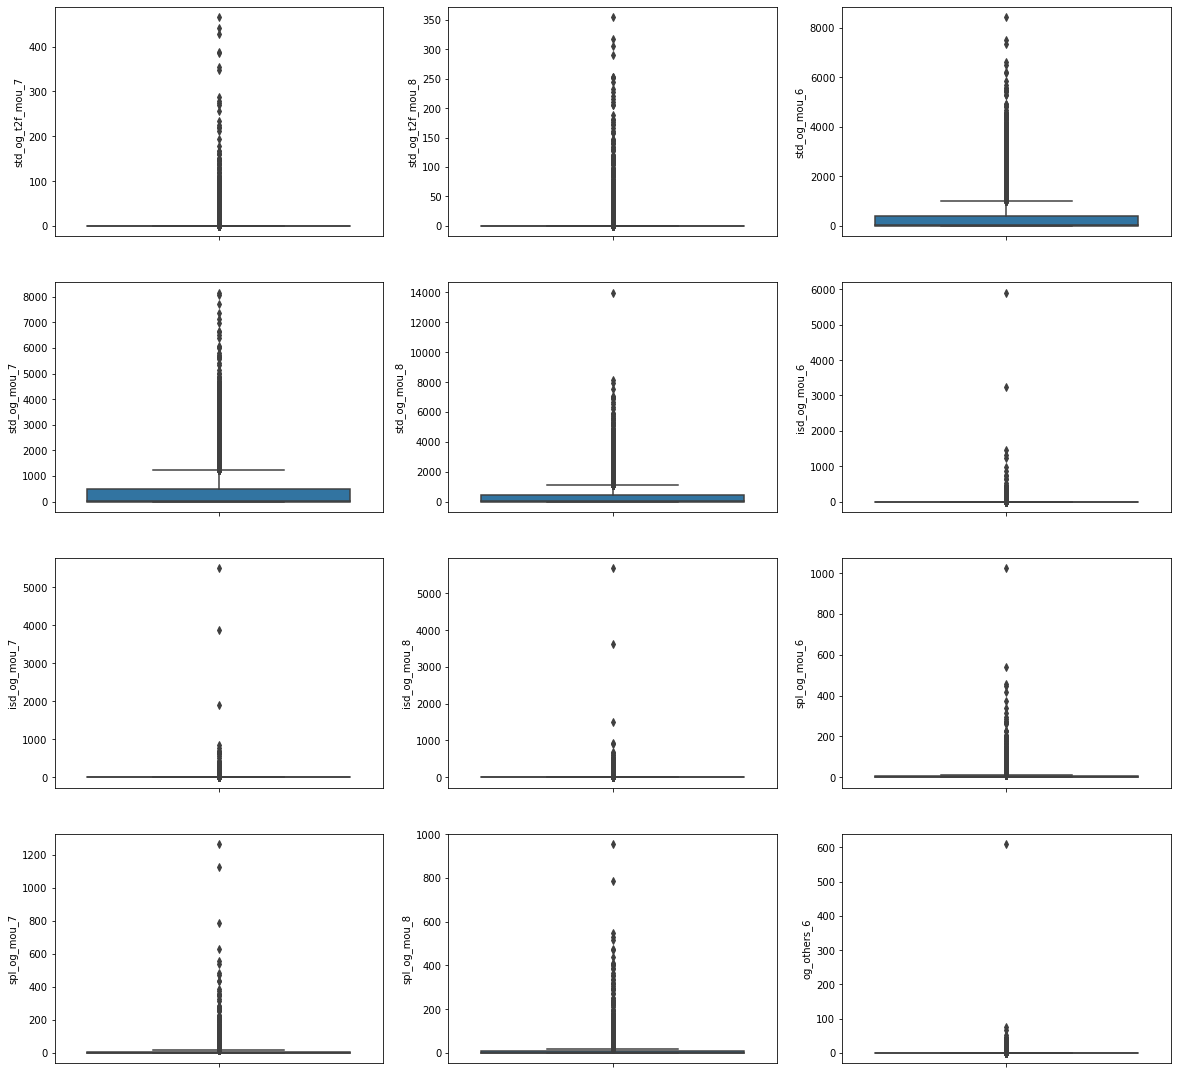

In [53]:
plt.figure(figsize=(20, 60))
i=37
while i <=48:
    plt.subplot(12,3,i-36)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

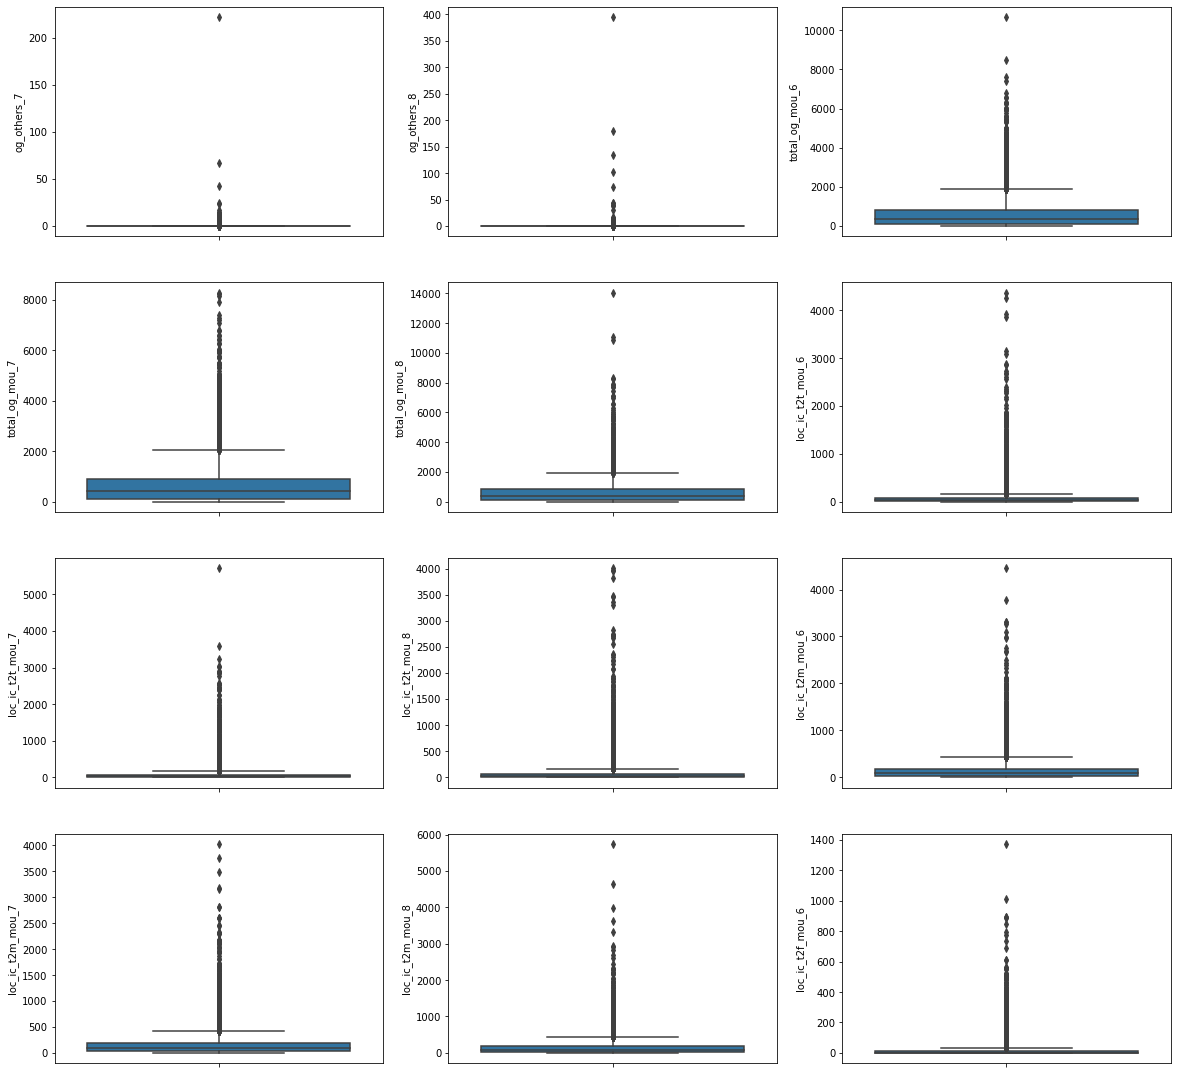

In [54]:
plt.figure(figsize=(20, 60))
i=49
while i <=60:
    plt.subplot(12,3,i-48)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

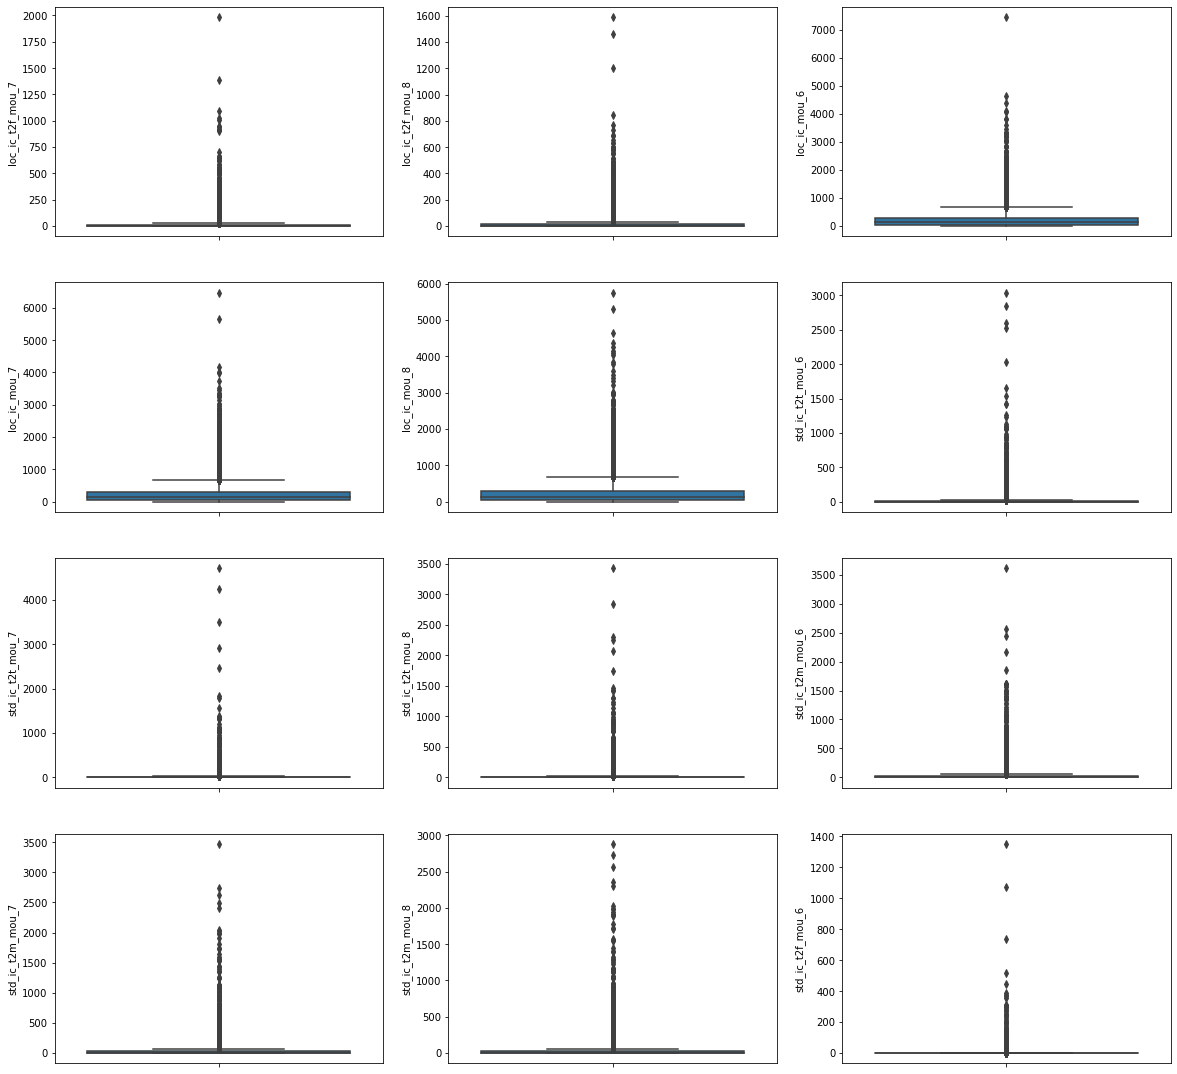

In [55]:
plt.figure(figsize=(20, 60))
i=61
while i <=72:
    plt.subplot(12,3,i-60)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

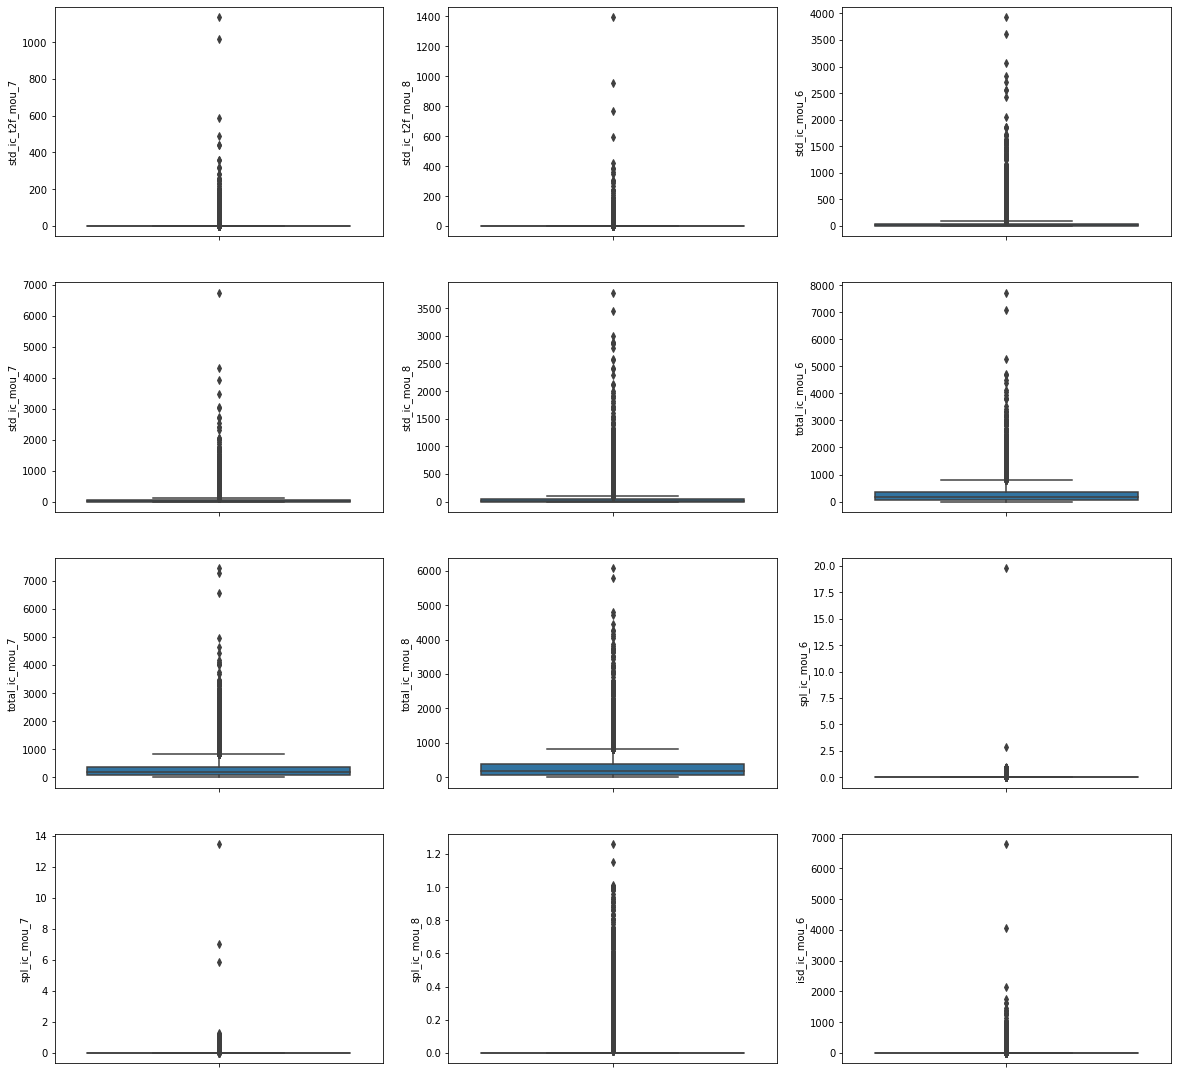

In [56]:
plt.figure(figsize=(20, 60))
i=73
while i <=84:
    plt.subplot(12,3,i-72)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

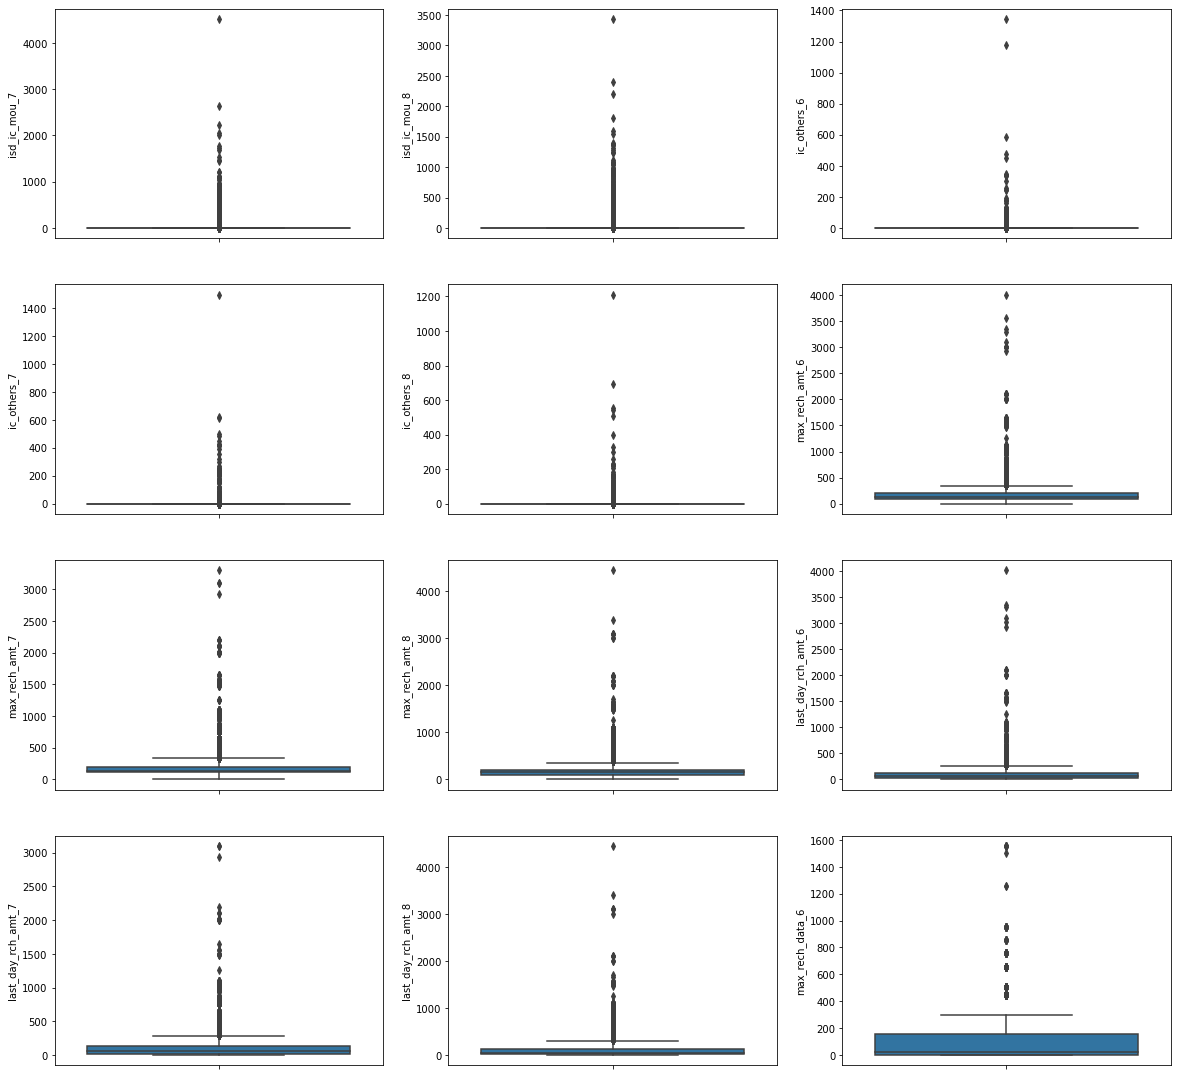

In [57]:
plt.figure(figsize=(20, 60))
i=85
while i <=96:
    plt.subplot(12,3,i-84)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

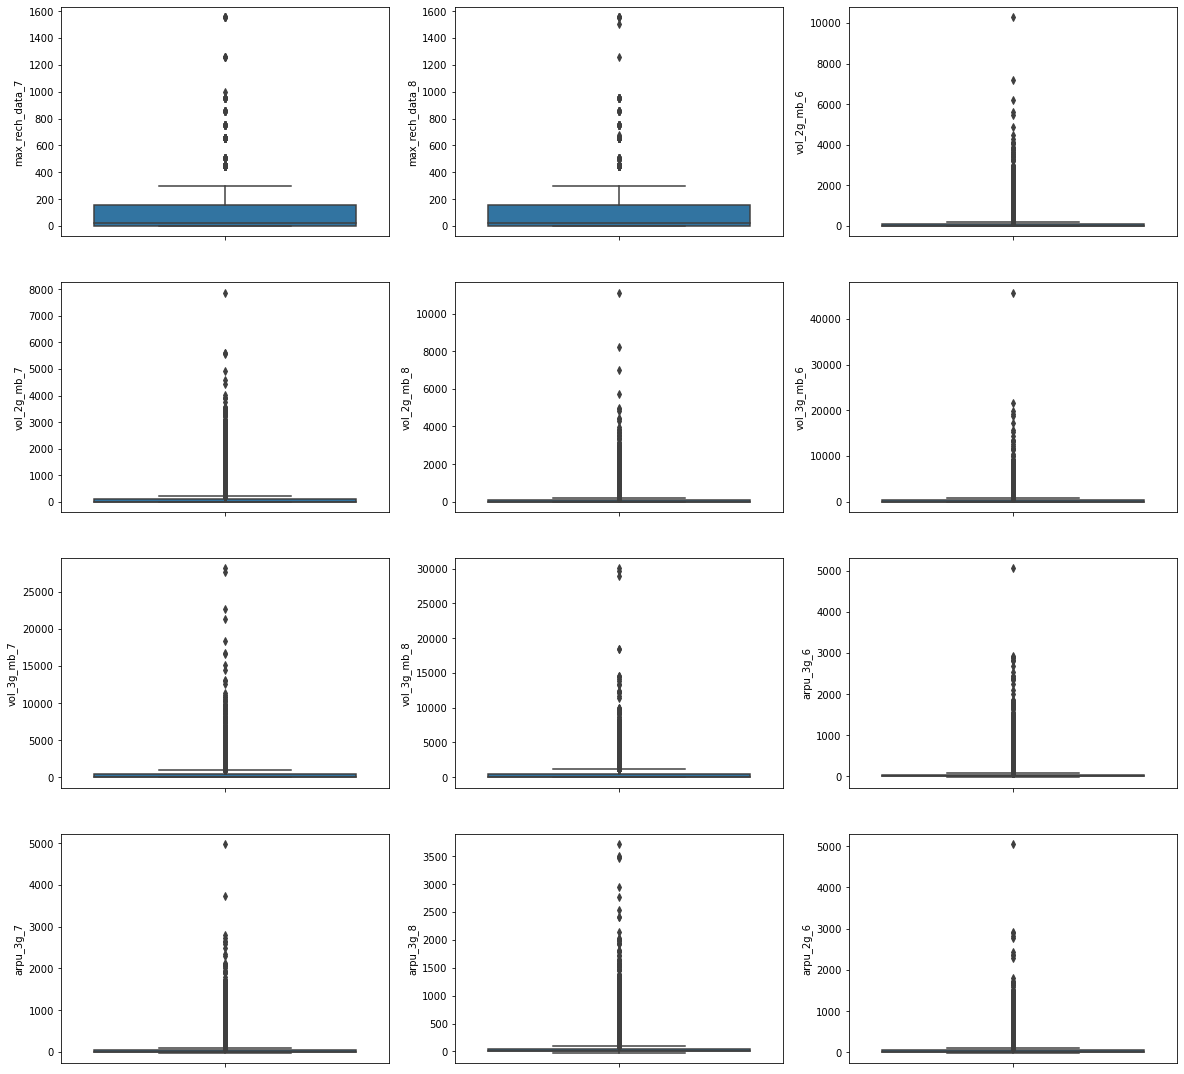

In [58]:
plt.figure(figsize=(20, 60))
i=97
while i <=108:
    plt.subplot(12,3,i-96)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

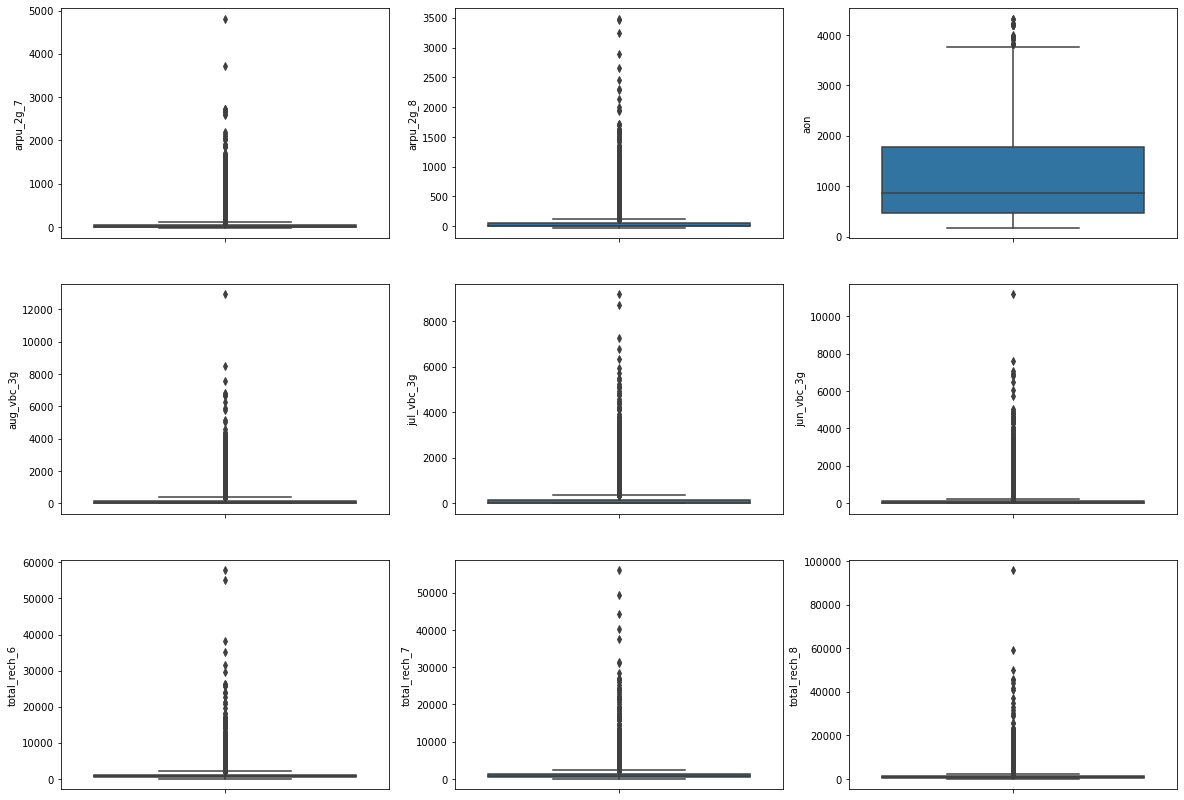

In [59]:
plt.figure(figsize=(20, 60))
i=109
while i <=117:
    plt.subplot(12,3,i-108)
    sns.boxplot(y = numerical_columns[i], data = df_churn)
    i=i+1
plt.show()

In [60]:
#plt.figure(figsize=(5, 5))
#i=121
#while i <=121:
#    plt.subplot(1,1,i-120)
#    sns.boxplot(y = numerical_columns[i], data = df_churn)
#    i=i+1
#plt.show()

In [61]:
cor = df_churn.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

std_og_mou_6    offnet_mou_6        0.600060
arpu_8          arpu_6              0.603791
std_ic_mou_6    std_ic_t2m_mou_7    0.604609
total_ic_mou_7  loc_ic_t2t_mou_7    0.605469
aug_vbc_3g      vol_3g_mb_8         0.605602
                                      ...   
arpu_2g_8       arpu_3g_8           0.931703
isd_og_mou_7    isd_og_mou_6        0.937425
arpu_2g_6       arpu_3g_6           0.938064
arpu_2g_7       arpu_3g_7           0.940022
isd_og_mou_8    isd_og_mou_7        0.951444
Length: 216, dtype: float64

In [62]:
print("Final Dimension before PCA:", df_churn.shape)

Final Dimension before PCA: (21001, 128)


In [63]:
y_train = df_churn['churn_probability']
X_train = df_churn.drop('churn_probability', axis=1)

In [64]:
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

In [65]:
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_6,total_rech_7,total_rech_8
4,-0.618887,-0.859510,-0.867926,-0.498890,-0.537087,-0.513595,-0.633933,-0.684725,-0.713859,0.511472,-0.159868,-0.167045,-0.090402,-0.204739,-0.187143,-0.316428,-0.328816,-0.316519,-0.494677,-0.598850,-0.660409,0.288340,-0.251266,-0.056313,-0.239049,0.858537,-0.248518,-0.498173,-0.603481,-0.620448,-0.393128,-0.406708,-0.390945,-0.415095,-0.438331,-0.41318,-0.145214,-0.137643,-0.150919,-0.540038,-0.567753,-0.539396,-0.043151,-0.043119,-0.044204,-0.319417,0.422728,-0.325567,-0.136445,-0.019269,-0.020047,-0.753618,-0.809836,-0.808873,-0.377260,-0.406949,-0.394899,-0.647372,-0.696763,-0.618084,-0.223182,-0.256374,-0.201612,-0.673328,-0.730750,-0.663092,-0.202867,-0.186531,-0.208831,-0.303492,-0.303591,-0.301214,-0.137417,-0.153218,-0.136515,-0.350264,-0.335323,-0.347615,-0.735144,-0.784659,-0.733428,-0.305587,-0.136308,-0.266255,-0.127572,-0.152856,-0.162603,-0.07446,-0.089840,-0.090997,13,10,8,-0.651486,-0.743033,-0.819642,-0.515792,-0.640061,-0.476801,-0.458778,-0.340774,-0.491032,0.815806,0.555505,0.271912,-0.371014,-0.396884,-0.403521,-0.369895,-0.180372,-0.390329,-0.391915,-0.174734,-0.405650,0.0,0.0,0.0,1.0,1.0,1.0,-0.595808,-0.416463,-0.405532,-0.376893,0.293385,0.176772,-0.107793
15,0.088022,-0.357728,-0.408115,-0.522656,-0.495660,-0.122357,-0.086890,-0.067131,-0.331335,-0.206488,-0.159868,-0.167045,-0.223726,-0.204739,-0.187143,-0.315239,-0.246219,0.472053,0.633712,0.730088,0.126376,-0.146593,0.220288,-0.059927,-0.239049,-0.199244,-0.248518,0.215415,0.308430,0.381442,-0.393128,-0.406708,-0.390945,-0.426011,-0.438331,-0.41318,-0.145214,-0.137643,0.426973,-0.547296,-0.567753,-0.529495,-0.043151,-0.043119,-0.044204,-0.314856,-0.302864,-0.325567,-0.115147,-0.019269,-0.020047,-0.370230,-0.358400,-0.284323,-0.322353,-0.286781,1.737373,0.348041,2.909742,0.644050,-0.348942,-0.290893,-0.138878,0.027347,1.803804,1.324065,-0.202867,-0.186531,-0.208831,-0.303492,-0.303591,-0.301214,-0.137417,-0.095529,-0.136515,-0.350264,-0.328122,-0.347615,-0.136380,1.350235,0.964380,-0.305587,-0.136308,-0.266255,-0.127572,-0.152856,-0.162603,-0.07446,-0.089840,-0.090997,5,3,4,0.495554,0.476776,0.443399,-0.691955,0.381678,1.025014,0.688389,-0.702817,0.643321,0.417337,-0.383012

C:\Users\Uttam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


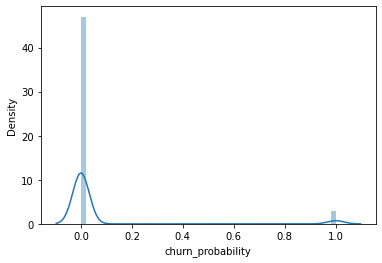

In [66]:
sns.distplot(y_train)
plt.show()

In [67]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

C:\Users\Uttam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


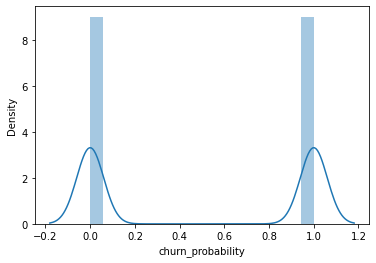

In [68]:
sns.distplot(y_res)
plt.show()

In [69]:
X_res.shape

(39488, 127)

In [74]:
pca = PCA(random_state=42)
pca.fit(X_res)

PCA(random_state=42)

In [75]:
pca.components_

array([[ 1.62388516e-02,  1.91263097e-02,  1.28659413e-02, ...,
         9.81298277e-03,  1.37980355e-02,  8.91117267e-03],
       [-4.83539317e-02,  8.47840904e-03,  4.80148147e-02, ...,
        -3.28221060e-02,  1.15804435e-02,  3.61705204e-02],
       [-3.26353426e-02,  4.24043286e-02, -3.75163200e-02, ...,
        -2.47006044e-02,  4.39683745e-02, -3.19161680e-02],
       ...,
       [-7.57338730e-08,  2.34271440e-07, -4.99546479e-08, ...,
         9.90384777e-08, -1.52380248e-07, -1.43913757e-07],
       [-1.15030313e-07,  1.16994030e-07, -7.04741077e-08, ...,
         8.10541230e-08,  5.21279802e-08, -1.73844470e-07],
       [-2.20009633e-08, -9.80047505e-08, -2.71910021e-07, ...,
         3.54484432e-08,  3.03244523e-08,  5.99522582e-08]])

In [72]:
pca.explained_variance_ratio_

array([5.34017507e-01, 1.47302110e-01, 6.06595618e-02, 2.72713300e-02,
       2.49131501e-02, 1.92212872e-02, 1.62585231e-02, 1.31474069e-02,
       1.13048991e-02, 7.70058345e-03, 6.24023598e-03, 6.06168892e-03,
       5.78929456e-03, 5.35069496e-03, 5.09987561e-03, 4.79541813e-03,
       4.40708079e-03, 4.34185105e-03, 4.11932278e-03, 3.97815752e-03,
       3.82752033e-03, 3.78884227e-03, 3.69475802e-03, 3.47046436e-03,
       3.12541038e-03, 2.82449377e-03, 2.61845335e-03, 2.55884174e-03,
       2.44193564e-03, 2.35625221e-03, 2.29872091e-03, 2.24705339e-03,
       2.11402764e-03, 2.00372847e-03, 1.94188549e-03, 1.92479694e-03,
       1.84858391e-03, 1.80681571e-03, 1.75939108e-03, 1.69187362e-03,
       1.66621167e-03, 1.46866251e-03, 1.43993187e-03, 1.40011752e-03,
       1.22053052e-03, 1.20213754e-03, 1.12492263e-03, 1.11308716e-03,
       1.09100581e-03, 1.07643871e-03, 1.06335530e-03, 1.00173627e-03,
       9.35793063e-04, 9.28255429e-04, 9.03280090e-04, 8.45247861e-04,
      

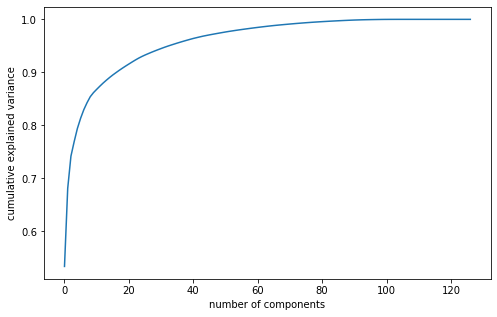

In [77]:
#Making the scree plot
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [90]:
## Verifying PC and variables
colnames = list(X_res.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head(20)

,PC1,PC2,Feature
0,0.016239,-0.048354,arpu_6
1,0.019126,0.008478,arpu_7
2,0.012866,0.048015,arpu_8
3,0.021155,-0.035255,onnet_mou_6
4,0.021648,0.003125,onnet_mou_7
5,0.016512,0.029081,onnet_mou_8
6,0.021142,-0.042510,offnet_mou_6
7,0.022408,0.000705,offnet_mou_7
8,0.014707,0.036219,offnet_mou_8
9,-0.001988,-0.001562,roam_ic_mou_6
